$$\huge  {\text {The Beats Problem}}$$
#### [Useful Link](http://www.animations.physics.unsw.edu.au/jw/beats.htm)

$${\large \hspace{10mm}
\begin{equation}
y_1(t) = A_1\cos(2\pi f_1 t) \quad \text{with} \quad 0 \leq t \leq T
\end{equation}
}
$$

$${\large \hspace{10mm}
\begin{equation}
y_2(t) = A_2\cos(2\pi f_2 t) \quad \text{with} \quad 0 \leq t \leq T
\end{equation}
}
$$

$${\large \hspace{10mm}
\begin{equation}
y(t) = y_1(t) + y_2(t) \quad \text{with} \quad 0 \leq t \leq T
\end{equation}
}
$$


${\large \text{Let's look at 3 cases when:}}$

$${\large \hspace{10mm}
\begin{equation}
A_1 = A_2 = 1, \quad f_1 = 50, \quad \text{and} \quad T = 1
\end{equation}
}
$$

${\large \text{for}}$

$${\large \hspace{10mm}
\begin{equation}
f_2 = 100, 75, 55
\end{equation}
}
$$

In [1]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
mpld3.enable_notebook()
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

In [2]:
Nt = 2048
T = 1
tinit = np.linspace(0, T, Nt + 1)
t = tinit[0:Nt]
A1 = 1; A2 = 1; f1 = 50; f21 = 100; f22 = 75; f23 = 55;

y1 = A1 * np.cos(2* np.pi * f1 * t)
y21 = A2 * np.cos(2* np.pi * f21 * t)
y22 = A2 * np.cos(2* np.pi * f22 * t)
y23 = A2 * np.cos(2* np.pi * f23 * t)

ySum1 = y1 + y21
ySum2 = y1 + y22
ySum3 = y1 + y23

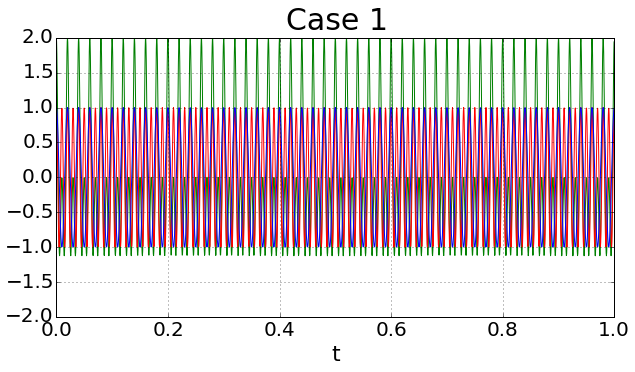

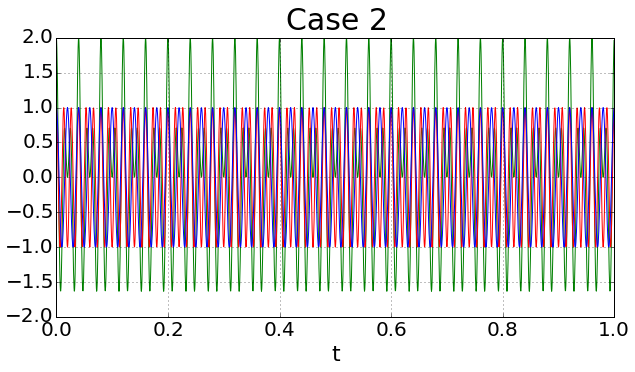

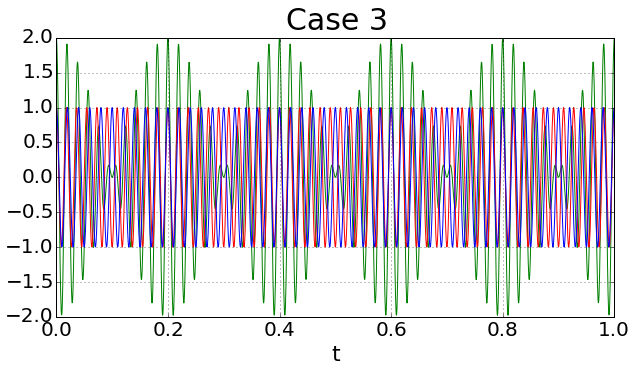

In [3]:
fig01 = plt.figure(1, figsize=(10, 5), dpi=90)

ax01 = plt.gca()
ax01.set_xlim([0,T])
ax01.set_ylim([-A1-A2,A1+A2])

ax01.plot(t, ySum1, 'g')
ax01.plot(t, y21, 'r')
ax01.plot(t, y1, 'b')

ax01.set_title("Case 1 ", fontsize=30, y=1.01)
ax01.set_xlabel('t')
ax01.grid('on')

plt.show()

#

fig02 = plt.figure(1, figsize=(10, 5), dpi=90)

ax02 = plt.gca()
ax02.set_xlim([0,T])
ax02.set_ylim([-A1-A2,A1+A2])

ax02.plot(t, ySum2, 'g')
ax02.plot(t, y22, 'r')
ax02.plot(t, y1, 'b')


ax02.set_title("Case 2 ", fontsize=30, y=1.01)
ax02.set_xlabel('t')
ax02.grid('on')

plt.show()

fig02 = plt.figure(1, figsize=(10, 5), dpi=90)

ax03 = plt.gca()
ax03.set_xlim([0,T])
ax03.set_ylim([-A1-A2,A1+A2])

ax03.plot(t, ySum3, 'g')
ax03.plot(t, y23, 'r')
ax03.plot(t, y1, 'b')

ax03.set_title("Case 3", fontsize=30, y=1.01)
ax03.set_xlabel('t')
ax03.grid('on')

plt.show()

${\large \text{For the third case ($f_1 = 50$ and $f_2=55$) let's look at the frequency domain:}}$

In [4]:
from numpy.fft import *

f =  [i *  (1.0 / T) for i in range(-Nt/2, 0)] + [i *  (1.0 / T) for i in range(0, Nt/2)]

yf1 = fftshift(fft(y1))
yf2 = fftshift(fft(y23))
yf3 = fftshift(fft(ySum3))

AmpCoeff = Nt/2 # chosen for sine and coseine and twice for constant signal

yf1absScaled = [i/float(AmpCoeff) for i in np.abs(yf1)]
yf2absScaled = [i/float(AmpCoeff) for i in np.abs(yf2)]
yf3absScaled = [i/float(AmpCoeff) for i in np.abs(yf3)]

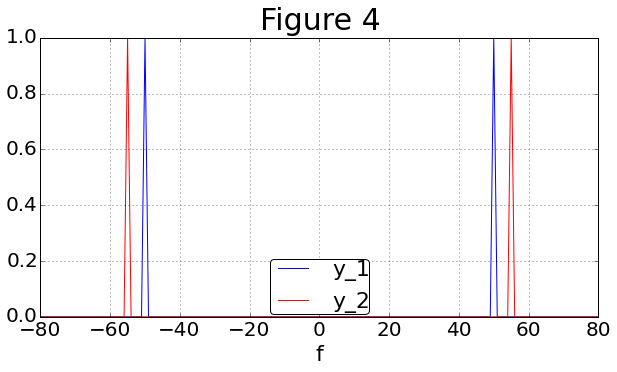

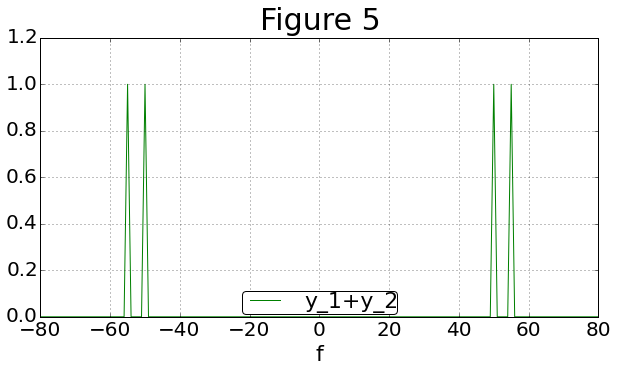

In [5]:
fig04 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.gca()
ax.set_xlim([-80,80])
ax.plot(f, yf1absScaled, 'b', label='y_1')
ax.plot(f, yf2absScaled, 'r', label='y_2')
ax.set_title("Figure 4 ", fontsize=30, y=1.01)
ax.set_xlabel('f')
ax.grid('on')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.03), borderpad=0.05, fontsize=22, fancybox=True, title='')
plt.show()

fig05 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.gca()
ax.set_xlim([-80,80])
ax.plot(f, yf3absScaled, 'g', label='y_1+y_2')
ax.set_title("Figure 5 ", fontsize=30, y=1.01)
ax.set_xlabel('f')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.03), borderpad=0.05, fontsize=22, fancybox=True, title='')
ax.grid('on')

plt.show()

$$\large {\text {Thus the $Beats$ frequency will not be captured by fft.}}$$